In [2]:
from hye_project.my_package.stat_file import normality, stat_test

In [35]:
# -------
# library
# -------

# Standard library
from itertools import combinations

# Typing
from typing import Any, Dict, Tuple, Union

# Data handling
import numpy as np
import pandas as pd
import ast

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Reporting
from tabulate import tabulate

# Statistical analysis
import scipy.stats as stats
from scipy.stats import levene, pearsonr, spearmanr
from scipy.spatial.distance import squareform

# Clustering
import scipy.cluster.hierarchy as sch

# Post-hoc tests
import scikit_posthocs as sp

# Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Network analysis
import networkx as nx

In [3]:
print(dir(normality)) # test, print_normality
print(dir(stat_test)) # decide, kruskal_dunn, chi2_assoc, p-heatmap

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'print_normality', 'test']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'chi2_assoc', 'decide', 'kruskal_dunn', 'p_heatmap']


In [24]:
csv_path = '/Users/hyeom/Documents/GitHub/advanced_project/Airbnb_project_15/outlier_removed.csv'    # 여기에 absolute path

# CSV 읽기
df = pd.read_csv(
    csv_path,
    header=0,        # 첫 줄을 컬럼명으로 사용
    index_col='id',  # 인덱스 컬럼으로 id 지정
    encoding='utf-8-sig'
)

# 데이터 확인
df.head(2)

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_60,availability_365,instant_bookable,...,host_is_superhost,host_has_profile_pic,host_identity_verified,host_response_time_score,host_response_rate_score,host_acceptance_rate_score,host_location_ny,host_location_boolean,log_price,room_new_type
id,,,,,,,,,,,,,,,,,,,,,
36121,Prospect Heights,Brooklyn,40.673760,-73.966110,200.0,0,0.0,57,362,0,...,0,1,1,4.0,4,4,1,1,5.303305,mid
36647,East Harlem,Manhattan,40.792454,-73.940742,82.0,0,0.0,0,204,0,...,0,1,1,4.0,4,4,1,1,4.418841,upper-mid


In [9]:
df.columns

Index(['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'price', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'availability_60', 'availability_365',
       'instant_bookable', 'is_long_term', 'is_activate', 'amenities',
       'amenities_cnt', 'room_type', 'room_structure_type', 'accommodates',
       'bath_score_mul', 'beds', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'id', 'host_id',
       'name_length_group', 'description_length_group',
       'neighborhood_overview_exists', 'host_about_length_group',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_time_score', 'host_response_rate_score',
       'host_acceptance_rate_score', 'host_locat

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20560 entries, 36121 to 1366723228243064949
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        20560 non-null  object 
 1   neighbourhood_group_cleansed  20560 non-null  object 
 2   latitude                      20560 non-null  float64
 3   longitude                     20560 non-null  float64
 4   price                         20560 non-null  float64
 5   estimated_occupancy_l365d     20560 non-null  int64  
 6   estimated_revenue_l365d       20560 non-null  float64
 7   availability_60               20560 non-null  int64  
 8   availability_365              20560 non-null  int64  
 9   instant_bookable              20560 non-null  int64  
 10  is_long_term                  20560 non-null  int64  
 11  is_activate                   20560 non-null  int64  
 12  amenities                     20560 non-null  o

In [26]:
df['occupancy_flag'] = df['estimated_occupancy_l365d'].notna().astype(int)

In [27]:
pri_cols = ['occupancy_flag', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'price', 'log_price']
idx_cols = ['host_id', 'id']

room_cols = ['amenities_cnt', 'room_type', 'room_new_type', 'accommodates', 'bath_score_mul', 'beds' ]
nei_cols = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', ]
rei_cols = ['number_of_reviews', 'review_scores_rating']

Pearson r = 0.214  (p=3.05e-211)
Spearman ρ = 0.214  (p=5.49e-211)
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.5830      0.010    456.121      0.000       4.563       4.603
amenities_cnt     0.0094      0.000     31.385      0.000       0.009       0.010


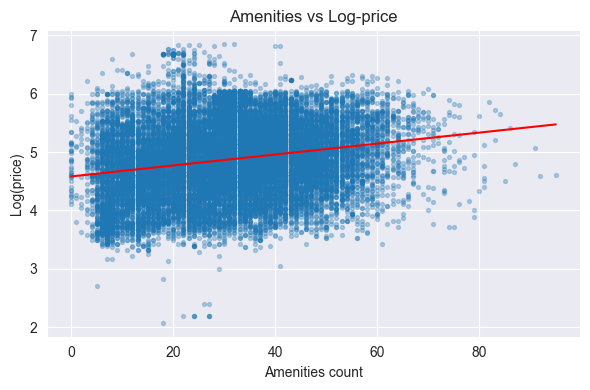

In [28]:
# ------------------------------------------------------------------
# ammenities_cnt와 log_price 상관계수 확인
# -> 어느정도 상관관계가 있지만, 약한 상관관계
# ------------------------------------------------------------------
df_use = df[['amenities_cnt', 'log_price']].dropna()

# ── ① 상관계수
pear_r, pear_p = pearsonr(df_use['amenities_cnt'], df_use['log_price'])
spear_r, spear_p = spearmanr(df_use['amenities_cnt'], df_use['log_price'])

print(f"Pearson r = {pear_r:.3f}  (p={pear_p:.3g})")
print(f"Spearman ρ = {spear_r:.3f}  (p={spear_p:.3g})")

# ── ② 단순 선형회귀
model = smf.ols("log_price ~ amenities_cnt", data=df_use).fit()
print(model.summary().tables[1])   # 계수표만 출력

# ── ③ 산점도 + 회귀선
plt.figure(figsize=(6,4))
plt.scatter(df_use['amenities_cnt'], df_use['log_price'], s=8, alpha=.3)
x = np.linspace(df_use['amenities_cnt'].min(), df_use['amenities_cnt'].max(), 100)
y_hat = model.params['Intercept'] + model.params['amenities_cnt'] * x
plt.plot(x, y_hat, color='red')
plt.xlabel("Amenities count")
plt.ylabel("Log(price)")
plt.title("Amenities vs Log-price")
plt.tight_layout(); plt.show()


In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

df['amen_list'] = df['amenities'].apply(eval)        # 문자열 → 리스트
mlb      = MultiLabelBinarizer()
amen_mat = mlb.fit_transform(df['amen_list'])
amen_df  = pd.DataFrame(amen_mat, columns=mlb.classes_, index=df.index)

df_amen  = pd.concat([df[['room_new_type']], amen_df], axis=1)

In [40]:
import pandas as pd, numpy as np
from scipy.stats import chi2_contingency

price_groups = df_amen['room_new_type'].unique()
amenities    = amen_df.columns

records = []

for amen in amenities:
    # 각 가격군 빈도
    freq = df_amen.groupby('room_new_type')[amen].mean()
    for grp in price_groups:
        p_grp = freq[grp]
        p_oth = freq.drop(grp).mean()
        rr = p_grp / p_oth if p_oth else np.nan

        # 2×k 카이제곱
        cont = pd.crosstab(df_amen['room_new_type'] == grp, df_amen[amen])
        chi2, p, *_ = chi2_contingency(cont, correction=False)

        records.append([amen, grp, p_grp, p_oth, rr, p])

freq_tbl = pd.DataFrame(records, columns=['amenity','group','p_grp','p_others','RR','p'])

In [41]:
COMMON_TH   = 0.70   # 공통 기준
SPECIAL_TH  = 0.40   # 그룹 내 빈도
RR_TH       = 1.5    # 상대풍부도
ALPHA       = 0.05   # 유의수준

# ① 공통 amenity
common_amen = (freq_tbl.groupby('amenity')['p_grp']
                        .min()
                        .loc[lambda s: s >= COMMON_TH]
                        .index.tolist())

# ② 특화 amenity
spec_df = (freq_tbl
           .query("p_grp >= @SPECIAL_TH and RR >= @RR_TH and p < @ALPHA"))

special_by_group = (spec_df.groupby('group')['amenity']
                            .apply(list)
                            .to_dict())

In [43]:
print("공통 amenity (필수):")
print(sorted(common_amen))

for g, lst in special_by_group.items():
    print(f"\n{g} 특화 amenity:")
    print(sorted(lst))


공통 amenity (필수):
['Carbon monoxide alarm', 'Essentials', 'Hangers', 'Smoke alarm', 'Wifi']

high 특화 amenity:
['Air conditioning', 'Building staff', 'Elevator', 'Gym', 'Heating', 'Paid parking off premises', 'Shampoo']

low-mid 특화 amenity:
['Cleaning products', 'Dining table', 'Exterior security cameras on property', 'Free street parking', 'Freezer', 'Laundromat nearby', 'Lock on bedroom door', 'Microwave']

mid 특화 amenity:
['Cooking basics', 'Kitchen', 'Oven']

upper-mid 특화 amenity:
['Bathtub', 'Cleaning products', 'Cooking basics', 'Dishes and silverware', 'Elevator', 'Freezer']


In [56]:
import ast, pandas as pd
from scipy.stats import ttest_ind

df['amen_list'] = df['amenities'].fillna('[]').apply(ast.literal_eval)

amen_dict = {
    'common'    : ['Carbon monoxide alarm','Essentials','Hangers','Smoke alarm','Wifi'],
    'high'      : ['Air conditioning','Building staff','Elevator','Gym','Heating',
                   'Paid parking off premises','Shampoo'],
    'upper_mid' : ['Bathtub','Cleaning products','Cooking basics',
                   'Dishes and silverware','Elevator','Freezer'],
    'mid'       : ['Cooking basics','Kitchen','Oven'],
    'low_mid'   : ['Cleaning products','Dining table','Exterior security cameras on property',
                   'Free street parking','Freezer','Laundromat nearby','Lock on bedroom door',
                   'Microwave']
}

amen_grp = {}
for g, lst in amen_dict.items():
    for a in lst:
        amen_grp[a] = amen_grp.get(a, []) + [g]
amen_grp = {k: " / ".join(v) for k, v in amen_grp.items()}

for amen in amen_grp:
    df[f'has_{amen.replace(" ","_")}'] = df['amen_list'].apply(lambda lst: int(amen in lst))

records = []
for amen in amen_grp:
    col   = f'has_{amen.replace(" ","_")}'
    g1, g0 = df.loc[df[col]==1,'log_price'], df.loc[df[col]==0,'log_price']
    t, p   = ttest_ind(g1, g0, equal_var=False)
    premium = (np.expm1(g1.mean()) / np.expm1(g0.mean()) - 1) * 100     # %
    records.append([amen, amen_grp[amen], len(g1), len(g0), premium, p])

out = (pd.DataFrame(records,
                    columns=['amenity','group','n_have','n_no','premium_%','p'])
         .sort_values('premium_%', ascending=False))

# 보기 좋게 출력
print(tabulate(out[['amenity','group','premium_%','p']],
               headers='keys', tablefmt='github', floatfmt=".2f"))


|    | amenity                               | group               |   premium_% |    p |
|----|---------------------------------------|---------------------|-------------|------|
|  8 | Gym                                   | high                |      103.29 | 0.00 |
|  6 | Building staff                        | high                |       78.88 | 0.00 |
|  7 | Elevator                              | high / upper_mid    |       54.49 | 0.00 |
|  1 | Essentials                            | common              |       43.86 | 0.00 |
| 11 | Shampoo                               | high                |       40.04 | 0.00 |
| 10 | Paid parking off premises             | high                |       33.40 | 0.00 |
|  2 | Hangers                               | common              |       28.64 | 0.00 |
| 12 | Bathtub                               | upper_mid           |       19.69 | 0.00 |
|  5 | Air conditioning                      | high                |       18.08 | 0.00 |
|  3 | Smo

In [52]:
import statsmodels.formula.api as smf

base_vars = ['C(room_new_type)']  # 예시
amen_vars = [f"has_{amen.replace(' ','_')}" for amen in set(amen_grp)]

formula = "log_price ~ " + " + ".join(base_vars + amen_vars)
model   = smf.ols(formula, data=df).fit(cov_type='HC3')

# amenity 계수, p값만 뽑기
amen_coefs = (model.params[amen_vars]
              .to_frame('β')
              .join(model.pvalues[amen_vars].to_frame('p')))
amen_coefs['premium_%'] = (np.exp(amen_coefs['β']) - 1)*100
print(amen_coefs.sort_values('premium_%', ascending=False).head(29))


                                                  β             p  premium_%
has_Gym                                    0.230010  4.657627e-46  25.861283
has_Building_staff                         0.213482  1.340800e-41  23.798155
has_Essentials                             0.167849  8.555790e-45  18.275808
has_Shampoo                                0.156213  9.084993e-79  16.907466
has_Cooking_basics                         0.136336  1.317076e-33  14.606681
has_Bathtub                                0.116411  3.229848e-44  12.345729
has_Elevator                               0.102299  1.742389e-23  10.771462
has_Kitchen                                0.098600  2.772196e-15  10.362488
has_Air_conditioning                       0.092056  1.873074e-28   9.642573
has_Smoke_alarm                            0.055664  6.735562e-03   5.724267
has_Paid_parking_off_premises              0.051101  1.654231e-04   5.242877
has_Dining_table                           0.050379  2.457882e-07   5.166988

In [62]:
df['amen_list'] = df['amenities'].fillna('[]').apply(ast.literal_eval)

amen_dict = {
    'common'    : ['Carbon monoxide alarm','Essentials','Hangers','Smoke alarm','Wifi'],
    'high'      : ['Air conditioning','Building staff','Elevator','Gym','Heating',
                   'Paid parking off premises','Shampoo'],
    'upper_mid' : ['Bathtub','Cleaning products','Cooking basics',
                   'Dishes and silverware','Elevator','Freezer'],
    'mid'       : ['Cooking basics','Kitchen','Oven'],
    'low_mid'   : ['Cleaning products','Dining table','Exterior security cameras on property',
                   'Free street parking','Freezer','Laundromat nearby','Lock on bedroom door',
                   'Microwave']
}

for g, lst in amen_dict.items():
    df[f'{g}_cnt'] = df['amen_list'].apply(lambda L: sum(a in L for a in lst))

In [64]:
cont_cols = [c for c in df.columns if c.endswith('_cnt')]

# 1) Pearson r
for c in cont_cols:
    r, p = pearsonr(df[c], df['log_price'])
    print(f"{c}:  r={r:.3f},  p={p:.3g}")

# 2) 다변량 OLS (count → log_price)
formula = "log_price ~ high_cnt + upper_mid_cnt + mid_cnt + low_mid_cnt"
model   = smf.ols(formula, data=df).fit()
print(model.summary().tables[1])

# β → % 변환 예시
beta_high = model.params['high_cnt']
print("High amenity 1개↑  ⇒  가격 +", round((np.exp(beta_high)-1)*100,1), "%")

amenities_cnt:  r=0.214,  p=3.05e-211
common_cnt:  r=0.192,  p=1.64e-169
high_cnt:  r=0.360,  p=0
upper_mid_cnt:  r=0.131,  p=3.01e-79
mid_cnt:  r=0.076,  p=1.19e-27
low_mid_cnt:  r=-0.091,  p=3.89e-39
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.5420      0.011    400.949      0.000       4.520       4.564
high_cnt          0.1249      0.003     42.632      0.000       0.119       0.131
upper_mid_cnt     0.1430      0.004     33.716      0.000       0.135       0.151
mid_cnt          -0.0311      0.005     -5.976      0.000      -0.041      -0.021
low_mid_cnt      -0.0918      0.003    -31.440      0.000      -0.097      -0.086
High amenity 1개↑  ⇒  가격 + 13.3 %


In [85]:
# High amenity ≥1개 여부
X = 'has_any_high_amen'
df[X] = (df['high_cnt'] > 0).astype(int)

import scipy.stats as stats
g1 = df.loc[df[X]==1, 'log_price']
g0 = df.loc[df[X]==0, 'log_price']

t, p = stats.ttest_ind(g1, g0, equal_var=False)
print(f"mean diff = {np.expm1(g1.mean()) - np.expm1(g0.mean()):.1f} $ , p={p:.3g}")

if p < 0.05 :
    print(f'{X}인 숙소는 그렇지 않은 숙소보다 평균 {np.expm1(g1.mean()) - np.expm1(g0.mean()):.1f} $ 정도 더 비싸다.')

print (t)

mean diff = 17.6 $ , p=2.67e-21
has_any_high_amen인 숙소는 그렇지 않은 숙소보다 평균 17.6 $ 정도 더 비싸다.
9.585635349908845


/var/folders/y0/671x56056fg565s3792l4vnr0000gn/T/ipykernel_50523/2295956656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_any_high', y='price', data=df, palette='pastel', showfliers=False)


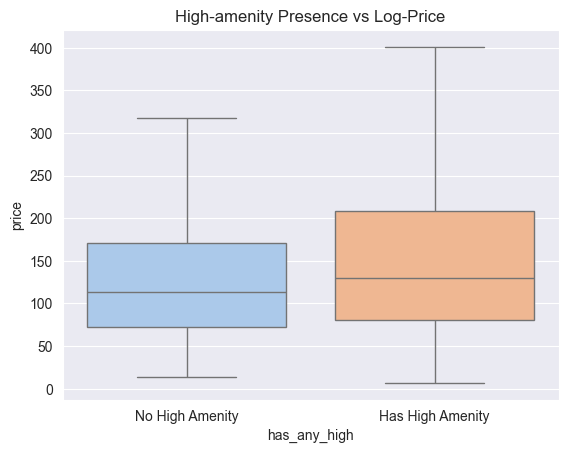

In [73]:
import seaborn as sns, matplotlib.pyplot as plt

sns.boxplot(x='has_any_high', y='price', data=df, palette='pastel', showfliers=False)
plt.xticks([0,1], ['No High Amenity','Has High Amenity'])
plt.title("High-amenity Presence vs Price")
plt.show()


In [86]:
X = 'is_long_term'
y = 'log_price'

stat_test.decide(df, X, y, verbose=True);


[정규성]
|   is_long_term |     n |   shapiro_p |      k2_p |
|----------------|-------|-------------|-----------|
|              1 | 16617 |    2.12e-23 | 3.59e-305 |
|              0 |  3943 |    5.1e-22  | 1.18e-21  |

[등분산성]
Levene p-value = 4.55e-30
→ Kruskal-Wallis + Dunn(보정) 권장.

[추천 검정 결과]
| 검정           |   통계량 |      p-값 |
|----------------|----------|-----------|
| Kruskal-Wallis |  807.263 | 1.42e-177 |


In [82]:
from scipy.stats import ttest_ind, mannwhitneyu

g_long = df.loc[df['is_long_term']==1, 'log_price']
g_short= df.loc[df['is_long_term']==0, 'log_price']

# Welch t-test (기본 equal_var=False)
t, p = ttest_ind(g_long, g_short, equal_var=False)
print(f"Welch t-test:  t={t:.2f},  p={p:.3g}")

# 비모수 대안
u, p_u = mannwhitneyu(g_long, g_short, alternative='two-sided')
print(f"Mann-Whitney U:  U={u:.0f},  p={p_u:.3g}")

mean_diff  = np.expm1(g_short.mean()) - np.expm1(g_long.mean())
pct_diff   = mean_diff / np.expm1(g_short.mean()) * 100
print(f"평균 가격 차이 ≈ ${mean_diff:.1f}  ({pct_diff:.1f} %)")


Welch t-test:  t=-32.54,  p=5.03e-215
Mann-Whitney U:  U=23240806,  p=1.42e-177
평균 가격 차이 ≈ $49.5  (29.1 %)


In [83]:
# ──────────────────────────────────────────────
# 0) 라이브러리 & 준비
# ──────────────────────────────────────────────
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor
import joblib, pprint, warnings
warnings.filterwarnings('ignore')

# ──────────────────────────────────────────────
# 1) Feature 리스트
# ──────────────────────────────────────────────
# ◾ amenity dummy : has_ 로 시작
amen_cols = [c for c in df.columns if c.startswith('has_')]

# ◾ amenity count : high_cnt · upper_mid_cnt … (숫자)
count_cols = ['high_cnt','upper_mid_cnt','mid_cnt','low_mid_cnt','amenities_cnt']

# ◾ 기타 수치형 예시
num_cols = count_cols + ['accommodates','beds','review_scores_rating']

# ◾ 범주형
cat_cols = ['room_new_type','neighbourhood_group_cleansed','room_type']

# ◾ 이항 플래그
bin_cols = ['is_long_term']

# ──────────────────────────────────────────────
# 2) train / test split  (로그-타깃)
# ──────────────────────────────────────────────
df['log_price'] = np.log1p(df['price'])

train, test = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['room_new_type']
)

X_train, y_train = train[num_cols + cat_cols + bin_cols + amen_cols], train['log_price']
X_test , y_test  = test[num_cols + cat_cols + bin_cols + amen_cols], test['log_price']

# ──────────────────────────────────────────────
# 3) 전처리 : 수치-표준화 / 범주-OneHot (희소)
# ──────────────────────────────────────────────
pre = ColumnTransformer(
        transformers=[
            ('num',  StandardScaler(), num_cols),
            ('cat',  OneHotEncoder(handle_unknown='ignore', sparse=True), cat_cols),
            ('bin',  'passthrough', bin_cols),     # 0/1 그대로
            ('amen', 'passthrough', amen_cols)     # 이미 0/1
        ],
        remainder='drop',       # 그 외 컬럼 무시
        sparse_threshold=0.3    # 희소 유지
      )

# ──────────────────────────────────────────────
# 4) 모델 : HistGradientBoostingRegressor (트리+부스팅)
# ──────────────────────────────────────────────
hgb = HistGradientBoostingRegressor(
        learning_rate=0.05,
        max_depth=6,
        l2_regularization=1.0,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
      )

pipe = Pipeline([
        ('pre', pre),
        ('model', hgb)
      ])

# ────────── 간단 튜닝 (RandomSearch) ──────────
param_dist = {
   'model__max_depth': [4,5,6,7,8],
   'model__learning_rate': [0.03,0.05,0.07,0.1],
   'model__l2_regularization': [0.0,0.5,1.0,2.0],
   'model__max_leaf_nodes': [31,63,127]
}
search = RandomizedSearchCV(
            pipe, param_dist, n_iter=25,
            scoring='neg_root_mean_squared_error',
            cv=5, n_jobs=-1, verbose=0, random_state=42
         ).fit(X_train, y_train)

best_model = search.best_estimator_
print("▶ Best params")
pprint.pprint(search.best_params_)

# ──────────────────────────────────────────────
# 5) 성능 평가 (로그→실가격으로 변환)
# ──────────────────────────────────────────────
pred_log  = best_model.predict(X_test)
rmse_log  = mean_squared_error(y_test, pred_log, squared=False)
mae_log   = mean_absolute_error(y_test, pred_log)

# 실가격
pred_price = np.expm1(pred_log)
true_price = np.expm1(y_test)
rmse_price = mean_squared_error(true_price, pred_price, squared=False)
mae_price  = mean_absolute_error(true_price, pred_price)

print(f"\nRMSE (log)   : {rmse_log:.3f}")
print(f"MAE  (log)   : {mae_log :.3f}")
print(f"RMSE ($)     : ${rmse_price:.2f}")
print(f"MAE  ($)     : ${mae_price :.2f}")

# ──────────────────────────────────────────────
# 6) 저장 (배포용)
# ──────────────────────────────────────────────
joblib.dump(best_model, "../03_MachineLearning/price_hgb_model.joblib")
print("\nSaved → price_hgb_model.joblib")


/Users/hyeom/PycharmProjects/statistics_2/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/hyeom/PycharmProjects/statistics_2/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/hyeom/PycharmProjects/statistics_2/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/hyeom/PycharmProjects/statistics_2/.venv/lib/python3.11/site-packages/sk

▶ Best params
{'model__l2_regularization': 2.0,
 'model__learning_rate': 0.05,
 'model__max_depth': 7,
 'model__max_leaf_nodes': 127}

RMSE (log)   : 0.356
MAE  (log)   : 0.270
RMSE ($)     : $64.01
MAE  ($)     : $41.12

Saved → price_hgb_model.joblib
